<a href="https://colab.research.google.com/github/JSJeong-me/RPA-2023/blob/main/Time_Series/prophet-install.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!conda install -c conda-forge prophet

/bin/bash: line 1: conda: command not found


In [1]:
import prophet

In [2]:
from prophet import Prophet

In [3]:
import pandas as pd

In [4]:
df = pd.read_excel('Total_final2.xls', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)
df.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [5]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [8]:
df_day.tail()

,ds,y
331,2020-03-27,8176.44
332,2020-03-28,4907.76
333,2020-03-29,4293.60
334,2020-03-30,9195.84
335,2020-03-31,8639.76


In [7]:
df_day.drop(df_day.index[336], inplace=True)

In [9]:
m = Prophet()
m.fit(df_day)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1cthwka/a17zqwr9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1cthwka/ofvhrjal.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29548', 'data', 'file=/tmp/tmpa1cthwka/a17zqwr9.json', 'init=/tmp/tmpa1cthwka/ofvhrjal.json', 'output', 'file=/tmp/tmpa1cthwka/prophet_modelmo71k534/prophet_model-20230813133602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:36:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:36:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
future = m.make_future_dataframe(30, freq='D') # Forecasting 30 days
future.tail()

,ds
361,2020-04-26
362,2020-04-27
363,2020-04-28
364,2020-04-29
365,2020-04-30


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
361,2020-04-26,4162.412921,1132.380836,7002.408194
362,2020-04-27,11656.797105,8659.842891,14524.461183
363,2020-04-28,11726.649349,8905.472541,14734.576513
364,2020-04-29,10807.705085,7879.199718,13706.909627
365,2020-04-30,10715.959984,7589.760255,13855.163468


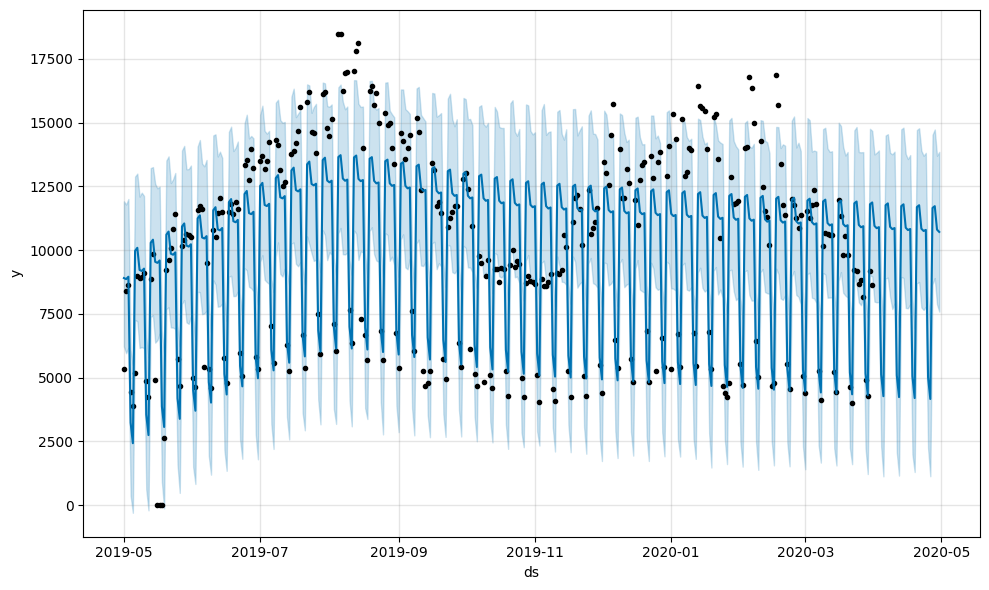

In [12]:
fig1 = m.plot(forecast)

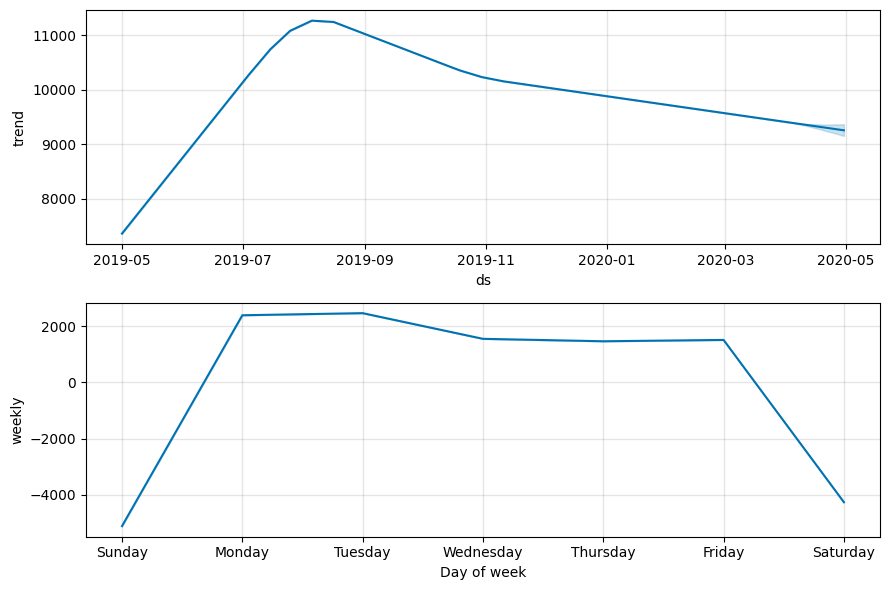

In [13]:
fig2 = m.plot_components(forecast)

In [14]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)